<a href="https://colab.research.google.com/github/Eslam-elnahas/My-Project-/blob/main/satellite_imagery_segmentation_ACT_output_and_ACT_heat_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coding of Data preparation **

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install patchify


In [3]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import random
from tensorflow.keras.utils import to_categorical


In [4]:
minmaxscaler = MinMaxScaler()

In [8]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset'

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 1'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 2'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 3'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 4'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 5'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 6'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 7'
drwx------ 2 root root 4.0K Aug  6 11:30 'Tile 8'


In [9]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite'

In [10]:
dataset_name = 'DubaiDataset'

In [11]:
for path,subdirs,files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
 #print(dir_name)
  if dir_name == 'masks': #images
   images=os.listdir(path)
   print(path)
   #print(images)
   for i,image_name in enumerate(images):
    if image_name.endswith('.png'): #jpg
     #print(image_name)
     a=True

/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/DubaiDataset/Tile 7/masks


In [12]:
image_patch_size=256

In [13]:

image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [14]:
image.shape

(544, 509, 3)

In [15]:
image_patches=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

تستخدم لإنشاء "قطع" أو "شرائح" من الصورة الأصلية باستخدام patchifyمكتبة  patchify



In [16]:
len(image_patches)

2

In [17]:
print (image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [18]:
image_x=image_patches[0,0,:,:]
#MinMaxScalar
image_y=minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)

In [19]:
image_y[0].shape

(256, 256, 3)

In [20]:
print(type(image))

<class 'numpy.ndarray'>


In [21]:
type(Image.fromarray(image))

PIL.Image.Image

In [22]:
image.shape

(544, 509, 3)

In [23]:
(image.shape[1]//image_patch_size)*image_patch_size

256

In [24]:
image_dataset=[]
mask_dataset=[]
for image_type in ['images','masks']:
  if image_type=='images':
   image_extestion='jpg'
  elif image_type=='masks':
   image_extestion='png'
  for tile_id in range(1,8):
    for image_id in range (1,20):
      image =cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extestion}',1)
      if image is not None:
        if image_type=='masks':
         image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x=(image.shape[1]//image_patch_size)*image_patch_size
        size_y=(image.shape[0]//image_patch_size)*image_patch_size
        #print('{}---- {} -- {}'.format(image.shape,size_x,size_y))
        image=Image.fromarray(image)
        image=image.crop((0,0,size_x,size_y))
        #print('{} , {}'.format(image.size[0],image.size[1]))
        image=np.array(image)
        patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type=='images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image =individual_patched_image [0]
              #print(individual_patched_image )
              image_dataset.append(individual_patched_image)
            elif image_type=='masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask=individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [25]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [26]:
mask_dataset=np.array(mask_dataset)
image_dataset=np.array(image_dataset)

In [27]:
type(image_dataset[0])

numpy.ndarray

In [28]:
type(np.reshape(image_dataset[0],image_patch_size*image_patch_size*3))

numpy.ndarray

In [29]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


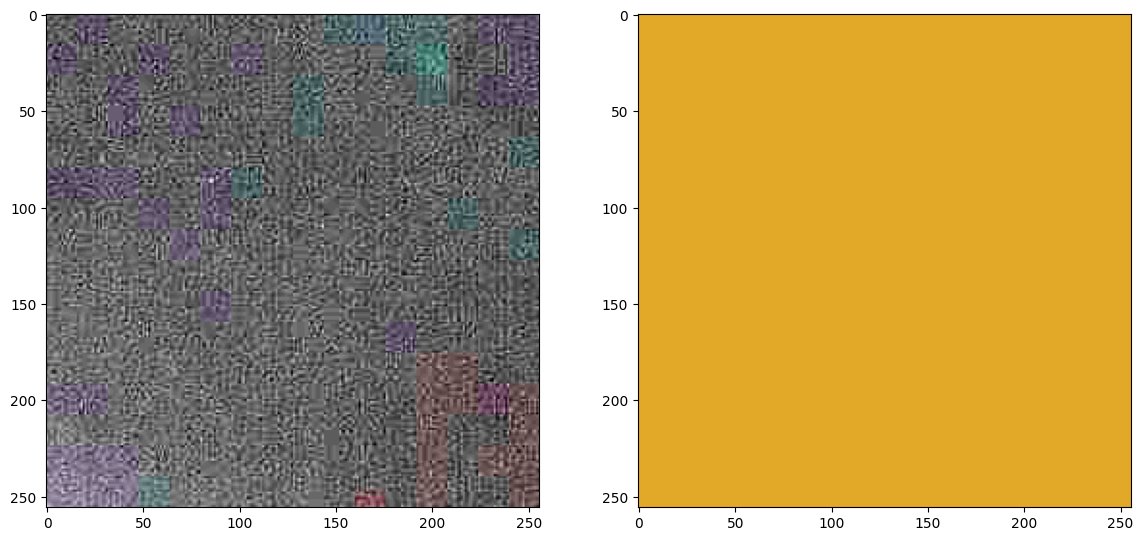

In [30]:

random_image_id=random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [31]:
class_building='#3C1098'
class_building=class_building.lstrip('#')
#3C1098
class_building=np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land='#8429F6'
class_land=class_land.lstrip('#')
#8429F6
class_land=np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road='#6EC1E4'
class_road=class_road.lstrip('#')
#6EC1E4
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)


class_Vegetation='#FEDD3A'
class_Vegetation=class_Vegetation.lstrip('#')
#FEDD3A
class_Vegetation=np.array(tuple(int(class_Vegetation[i:i+2],16) for i in (0,2,4)))
print(class_Vegetation)

class_Water='#E2A929'
class_Water=class_Water.lstrip('#')
#E2A929
class_Water=np.array(tuple(int(class_Water[i:i+2],16) for i in (0,2,4)))
print(class_Water)


class_Unlabeled='#9B9B9B'
class_Unlabeled=class_Unlabeled.lstrip('#')
#9B9B9B
class_Unlabeled=np.array(tuple(int(class_Unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_Unlabeled)



[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [32]:
mask_dataset.shape[0]

945

In [33]:
label=individual_patched_mask

In [34]:
def rgb_to_label(label):
  label_segment=np.zeros(label.shape,dtype=np.uint8)
  label_segment[np.all(label==class_Water,axis=-1)]=0
  label_segment[np.all(label==class_land,axis=-1)]=1
  label_segment[np.all(label==class_road,axis=-1)]=2
  label_segment[np.all(label==class_building,axis=-1)]=3
  label_segment[np.all(label==class_Vegetation,axis=-1)]=4
  label_segment[np.all(label==class_Unlabeled,axis=-1)]=5
  #print(label_segment)
  label_segment=label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [35]:
labels=[]
for i in range (mask_dataset.shape[0]):
  label=rgb_to_label(mask_dataset[i])
  labels.append(label)

In [36]:
print(len(labels))

945


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
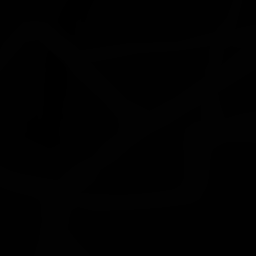

In [37]:
labels[3]

In [38]:
labels=np.expand_dims(labels,axis=3)

In [39]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [40]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [41]:
print('The label unique value is: ',format(np.unique(labels)))

The label unique value is:  [0 1 2 3 4 5]


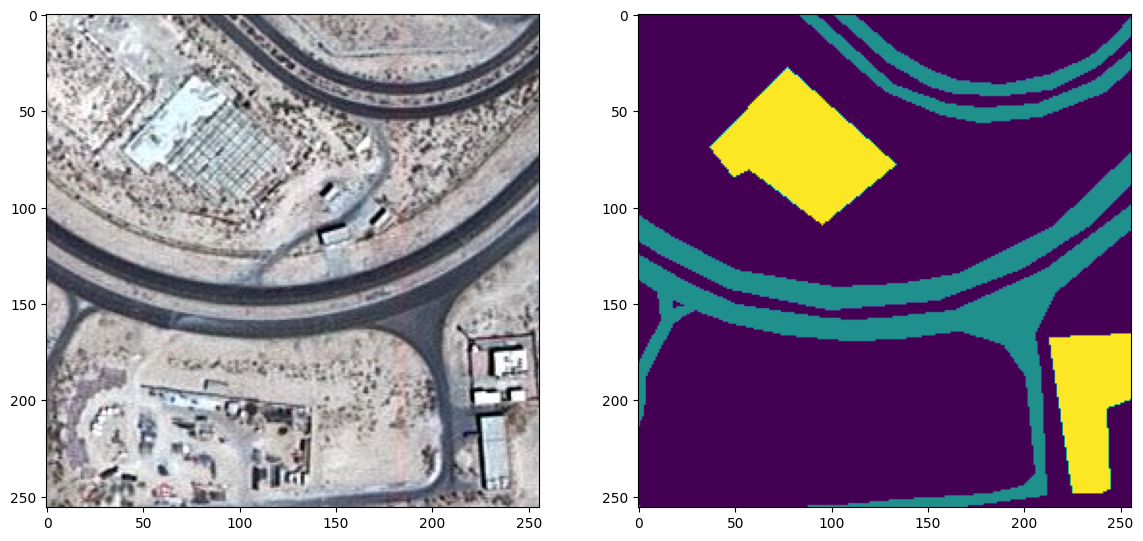

In [42]:

random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
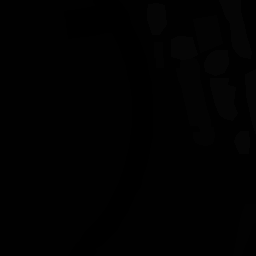

In [43]:
labels[0][:,:,0]

In [44]:
total_classes=len(np.unique(labels))

In [45]:
total_classes

6

In [46]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [47]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [48]:
master_trianing_dataset = image_dataset


In [49]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(master_trianing_dataset ,labels_categorical_dataset, test_size=0.15, random_state=100)



In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [52]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [53]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


**bold text**#Coding of Deep learning Model

In [54]:
!pip install -U segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00


In [55]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [56]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [57]:
from keras import backend as K

In [58]:
def Jaccard_coef(y_true,y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection=K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value=(intersection + 1.0 )/ (K.sum (y_true_flatten) + K.sum (y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [59]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
  inputs=Input((image_height,image_width,image_channels))
  source_input = inputs
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)


  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [60]:
metrics = ["accuracy", Jaccard_coef]


In [61]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)


256
256
3
6


In [62]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [63]:
model = get_deep_learning_model()

#create Loss Funcation

*   dice loss > Focal Loss > Total Loss

*   Total Loss = (Dice loss + (1*Focal Loss))



In [64]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [65]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [66]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [67]:
total_loss = dice_loss + (1 * focal_loss)


#Model compilation


In [68]:
import tensorflow as tf

In [69]:
# tf.compat.v1.reset_default_graph()

In [70]:
tf.keras.backend.clear_session()


In [71]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [72]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

#Visualize Model with Keras

In [73]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(x_test, y_test),
                          shuffle=False)


Epoch 1/10
51/51 [==============================] - 90s 2s/step - loss: 0.9949 - accuracy: 0.5819 - Jaccard_coef: 0.3014 - val_loss: 0.9836 - val_accuracy: 0.6817 - val_Jaccard_coef: 0.3681
Epoch 2/10
51/51 [==============================] - 83s 2s/step - loss: 0.9740 - accuracy: 0.6925 - Jaccard_coef: 0.4099 - val_loss: 0.9702 - val_accuracy: 0.6864 - val_Jaccard_coef: 0.4498
Epoch 3/10
51/51 [==============================] - 84s 2s/step - loss: 0.9617 - accuracy: 0.7183 - Jaccard_coef: 0.4664 - val_loss: 0.9684 - val_accuracy: 0.6883 - val_Jaccard_coef: 0.4646
Epoch 4/10
51/51 [==============================] - 83s 2s/step - loss: 0.9542 - accuracy: 0.7391 - Jaccard_coef: 0.4994 - val_loss: 0.9685 - val_accuracy: 0.6871 - val_Jaccard_coef: 0.4482
Epoch 5/10
51/51 [==============================] - 83s 2s/step - loss: 0.9509 - accuracy: 0.7474 - Jaccard_coef: 0.5057 - val_loss: 0.9741 - val_accuracy: 0.6808 - val_Jaccard_coef: 0.4560
Epoch 6/10
51/51 [==============================] 

In [ ]:
# model_history = model.fit(x_train, y_train,
#                           batch_size=16,
#                           verbose=1,
#                           epochs=10,
#                           validation_data=(x_test, y_test),
#                           callbacks=[plot_loss],
#                           shuffle=False)

In [74]:
history_a=model_history

In [75]:
# history_a.history

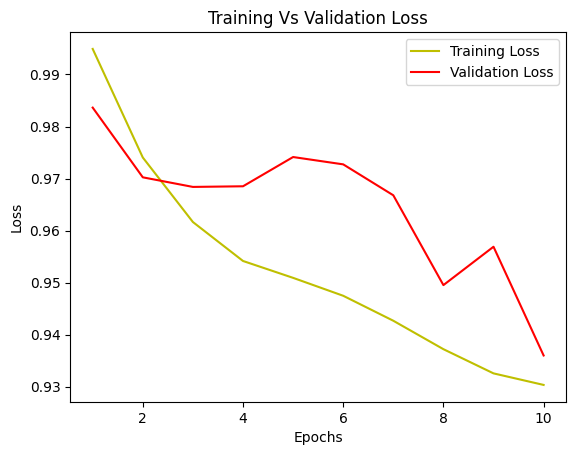

In [76]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

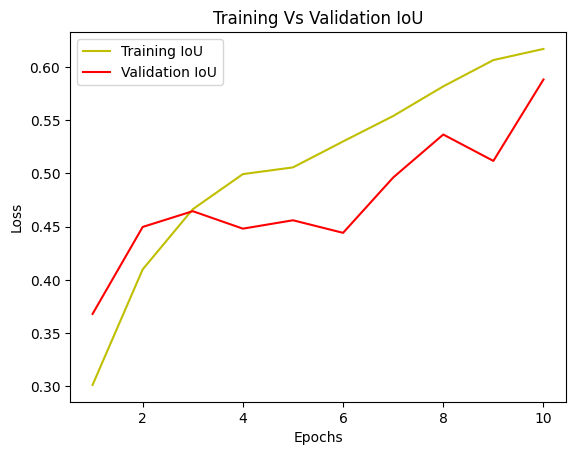

In [77]:
Jaccard_coef = history_a.history['Jaccard_coef']
val_Jaccard_coef = history_a.history['val_Jaccard_coef']

epochs = range(1, len(Jaccard_coef) + 1)
plt.plot(epochs, Jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_Jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [78]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 51}

In [79]:
y_pred = model.predict(x_test)

5/5 [==============================] - 2s 377ms/step


In [80]:
len(y_pred)

142

In [81]:
# y_pred

In [82]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [83]:
len(y_pred_argmax)

142

In [84]:
# y_pred_argmax

In [85]:
y_test_argmax = np.argmax(y_test, axis=3)

In [86]:
# y_test_argmax

#Comparing prediction results
###using test images using mask images and predicted result images..

In [87]:
import random

In [109]:
test_image_number = random.randint(0, len(x_test))

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)
prediction = saved_model.predict(test_image_input)

#prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]


1/1 [==============================] - 0s 309ms/step


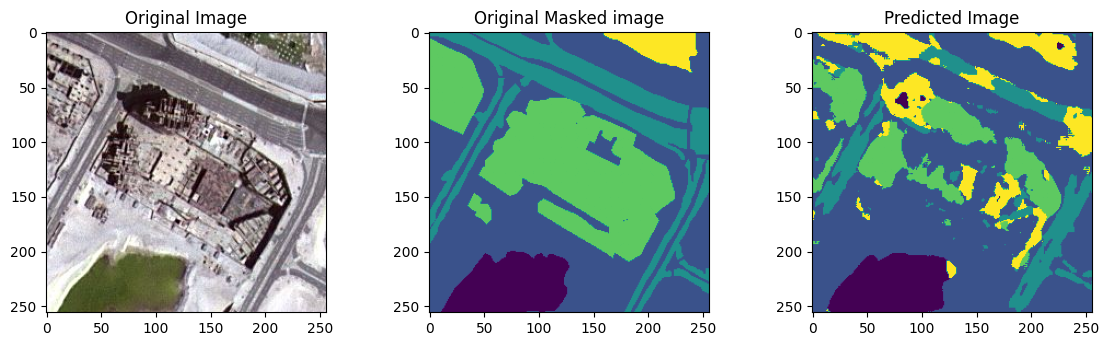

In [110]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

#Model Saveing with custom loss

In [111]:
model.save("satellite_segmentation.h5")

In [112]:
!ls -lah

total 45M
drwxr-xr-x 1 root root 4.0K Sep  4 10:21 .
drwxr-xr-x 1 root root 4.0K Sep  4 10:00 ..
drwxr-xr-x 1 root root 4.0K Sep  4 10:26 .config
drwx------ 5 root root 4.0K Sep  4 10:02 drive
drwxr-xr-x 1 root root 4.0K Sep  4 10:27 sample_data
-rw-r--r-- 1 root root  23M Sep  4 10:21 satellite_segmentation_full.h5
-rw-r--r-- 1 root root  23M Sep  4 10:31 satellite_segmentation.h5


In [113]:
from keras.models import load_model

In [114]:
saved_model = load_model('/content/satellite_segmentation.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': total_loss,
                                          'Jaccard_coef': Jaccard_coef}))

In [115]:
# saved_model.get_config()

#Performing Prediction using the custom image from Google Map:

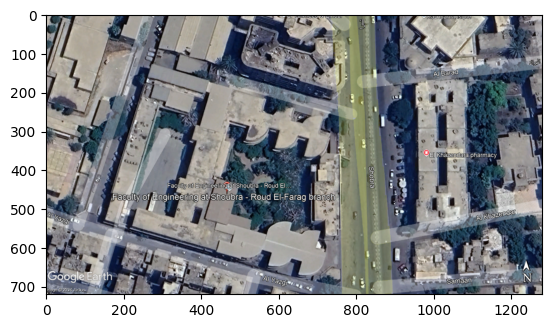

In [132]:
plt.imshow(Image.open('/content/PH_1.png'))


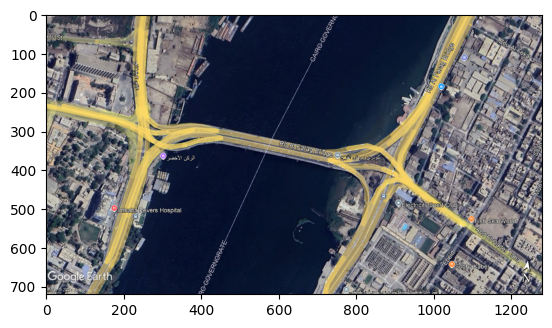

In [133]:
plt.imshow(Image.open('/content/PH_2.png'))


In [143]:
image = Image.open('/content/PH_1.png')
image = image.resize((256,256))
image = image.convert('RGB') # convert the image to RGB
image = np.array(image)
image = np.expand_dims(image, 0)

In [144]:
image.shape

(1, 256, 256, 3)

In [145]:
prediction = saved_model.predict(image)


1/1 [==============================] - 0s 51ms/step


In [146]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]


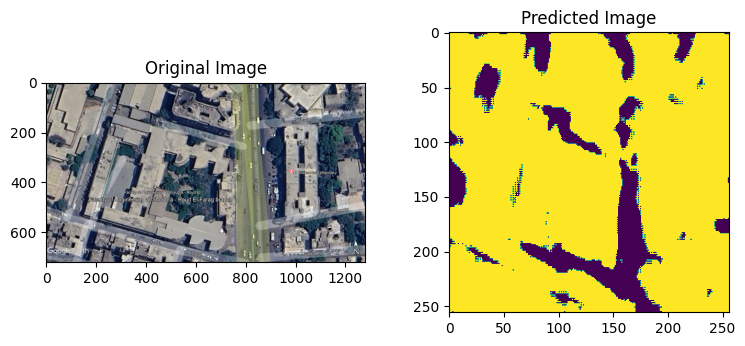

In [147]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('/content/PH_1.png'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)


#Collecting Activation and gradients output from Keras Model

In [148]:
!pip install keract


In [149]:
import keract

In [150]:
activations = keract.get_activations(saved_model, image, nodes_to_evaluate=None, output_format='simple', auto_compile=True)

In [151]:
!ls -lah /content/activations


total 12K
drwxr-xr-x 2 root root 4.0K Sep  4 10:49 .
drwxr-xr-x 1 root root 4.0K Sep  4 10:50 ..


In [152]:
keract.display_activations(activations, cmap='viridis', save=True, directory='/content/activations')


input_1 (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
dropout (1, 256, 256, 16) 
conv2d_1 (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_2 (1, 128, 128, 32) 
dropout_1 (1, 128, 128, 32) 
conv2d_3 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_4 (1, 64, 64, 64) 
dropout_2 (1, 64, 64, 64) 
conv2d_5 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
conv2d_6 (1, 32, 32, 128) 
dropout_3 (1, 32, 32, 128) 
conv2d_7 (1, 32, 32, 128) 
max_pooling2d_3 (1, 16, 16, 128) 
conv2d_8 (1, 16, 16, 256) 
dropout_4 (1, 16, 16, 256) 
conv2d_9 (1, 16, 16, 256) 
conv2d_transpose (1, 32, 32, 128) 
concatenate (1, 32, 32, 256) 
conv2d_10 (1, 32, 32, 128) 
dropout_5 (1, 32, 32, 128) 
conv2d_11 (1, 32, 32, 128) 
conv2d_transpose_1 (1, 64, 64, 64) 
concatenate_1 (1, 64, 64, 128) 
conv2d_12 (1, 64, 64, 64) 
dropout_6 (1, 64, 64, 64) 
conv2d_13 (1, 64, 64, 64) 
conv2d_transpose_2 (1, 128, 128, 32) 
concatenate_2 (1, 128, 128, 64) 
conv2d_14 (1, 128, 128, 32) 
dropout_7 (1, 128, 128, 32) 
conv2

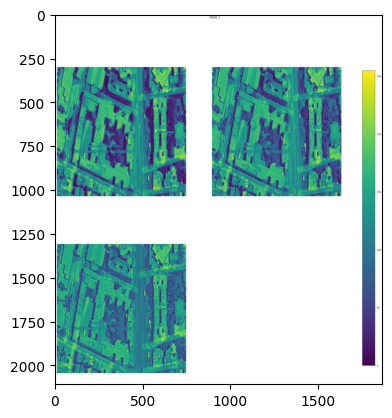

In [153]:
plt.imshow(Image.open('/content/activations/0_input_1.png'))

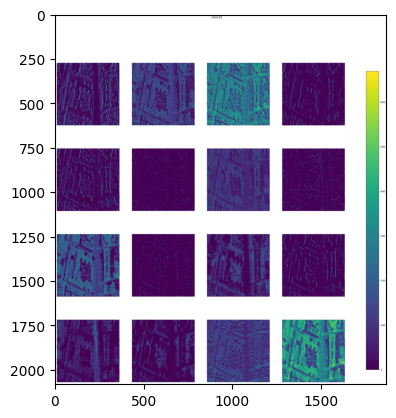

In [154]:
plt.imshow(Image.open('/content/activations/1_conv2d.png'))


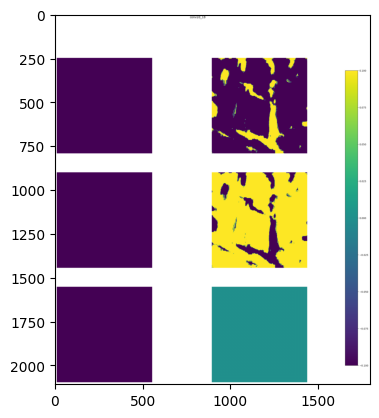

In [155]:
plt.imshow(Image.open('/content/activations/40_conv2d_18.png'))


In [157]:
image = Image.open('/content/PH_1.png')
image = image.resize((256,256))
image_as_array = np.array(image)
image_as_array = image_as_array.astype(np.float32)
keract.display_heatmaps(activations, image_as_array, save=True, directory='/content/heatmap')

input_1 (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
dropout (1, 256, 256, 16) 
conv2d_1 (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_2 (1, 128, 128, 32) 
dropout_1 (1, 128, 128, 32) 
conv2d_3 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_4 (1, 64, 64, 64) 
dropout_2 (1, 64, 64, 64) 
conv2d_5 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
conv2d_6 (1, 32, 32, 128) 
dropout_3 (1, 32, 32, 128) 
conv2d_7 (1, 32, 32, 128) 
max_pooling2d_3 (1, 16, 16, 128) 
conv2d_8 (1, 16, 16, 256) 
dropout_4 (1, 16, 16, 256) 
conv2d_9 (1, 16, 16, 256) 
conv2d_transpose (1, 32, 32, 128) 
concatenate (1, 32, 32, 256) 
conv2d_10 (1, 32, 32, 128) 
dropout_5 (1, 32, 32, 128) 
conv2d_11 (1, 32, 32, 128) 
conv2d_transpose_1 (1, 64, 64, 64) 
concatenate_1 (1, 64, 64, 128) 
conv2d_12 (1, 64, 64, 64) 
dropout_6 (1, 64, 64, 64) 
conv2d_13 (1, 64, 64, 64) 
conv2d_transpose_2 (1, 128, 128, 32) 
concatenate_2 (1, 128, 128, 64) 
conv2d_14 (1, 128, 128, 32) 
dropout_7 (1, 128, 128, 32) 
conv2

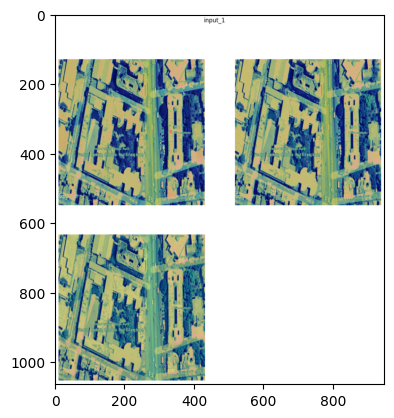

In [158]:
plt.imshow(Image.open('/content/heatmap/0_input_1.png'))


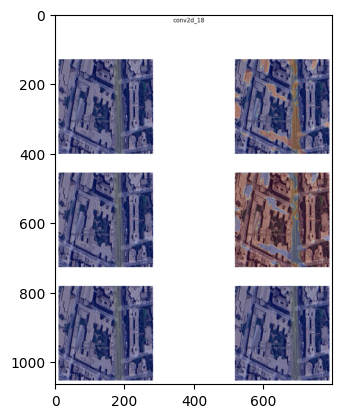

In [159]:
plt.imshow(Image.open('/content/heatmap/40_conv2d_18.png'))


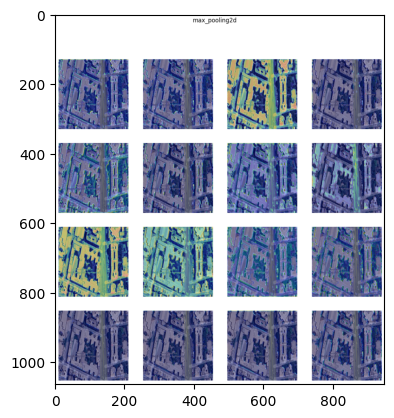

In [160]:
plt.imshow(Image.open('/content/heatmap/4_max_pooling2d.png'))


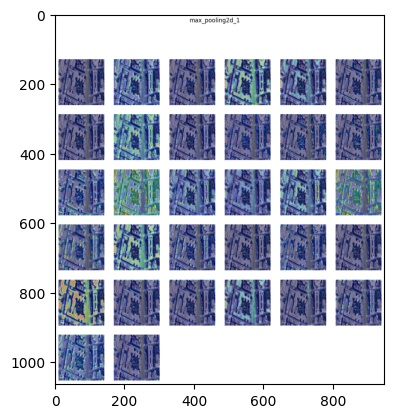

In [161]:
plt.imshow(Image.open('/content/heatmap/8_max_pooling2d_1.png'))


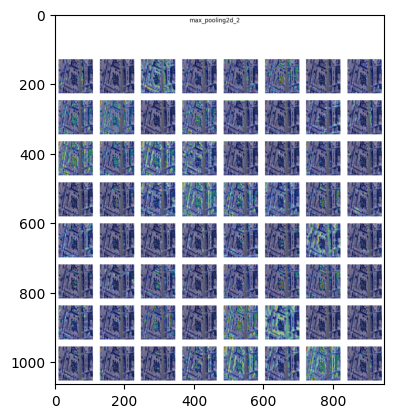

In [162]:
plt.imshow(Image.open('/content/heatmap/12_max_pooling2d_2.png'))


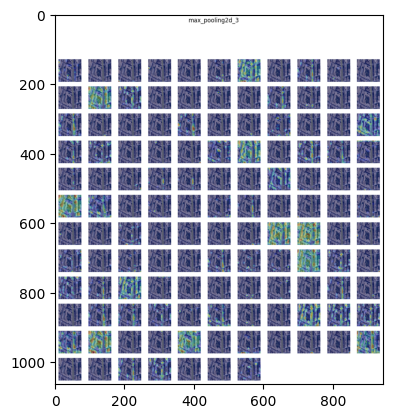

In [163]:
plt.imshow(Image.open('/content/heatmap/16_max_pooling2d_3.png'))
